## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==2.0.0 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.8.0 seaborn==0.13.1 xgboost==2.0.3 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 641.8 kB/s eta 0:00:00
ERROR: Cannot install matplotlib==3.8.0, numpy==2.0.0, pandas==2.2.2 and scikit-learn==1.6.1 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import(
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
)
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score,f1_score
warnings.filterwarnings("ignore")


## Import Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')
visa=pd.read_csv('EasyVisa.csv')

Mounted at /content/drive


## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [4]:
visa.head(5)


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
visa.tail(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [7]:
visa.shape

(25480, 12)

#### Check the data types of the columns for the dataset

In [8]:
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


out of 12 columns 9 are object(aka string datatype) 2 cols is integer and one col is float

In [12]:
visa.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [13]:
visa.duplicated().sum()

np.int64(0)

Overview of dataset:
The dataset consists of 25480 rows and 12 columns.

Out of 12 columns 9 are object(aka string datatype) 2 columns are integer and one column is float datatype.

There is no null or duplicate values. We have to create one hot encoding for string datatype.

We can drop the caseid column as it does not enhance anything in modeling.


In [5]:
##Creating a copy of the original dataset
fv=visa.copy()

In [6]:
##Dropping the case id column:
fv.drop('case_id',axis=1,inplace=True)

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [11]:
fv.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


#### Fixing the negative values in number of employees columns

In [7]:
fv['no_of_employees'] = fv['no_of_employees'].abs()

In [8]:
fv.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.089207,1979.409929,74455.814592
std,22877.917453,42.366929,52815.942327
min,11.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


the negative number of employees is fixed using absolute function.

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
cat_col= fv.columns[fv.dtypes==object]
for col in cat_col:
  print(fv[col].value_counts())
  print('*'*50)

num_col= fv.columns[fv.dtypes!=object]
for col in num_col:
  print(fv[col].value_counts())
  print('*'*50)

case_id
EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV13       1
EZYV12       1
EZYV11       1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64
**************************************************
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
**************************************************
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
**************************************************
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
**************************************************
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
**************************************************
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

Converting Pervailing Wages into annual format.

In [9]:
fv['unit_of_wage'].value_counts()
for index in fv.index:
    if fv.loc[index, 'unit_of_wage'] == 'Hour':
        fv.loc[index, 'prevailing_wage'] = fv.loc[index, 'prevailing_wage'] * 2080
        fv.loc[fv['unit_of_wage'] =='Hour','unit_of_wage']='Year'
    elif fv.loc[index, 'unit_of_wage'] == 'Week':
        fv.loc[index, 'prevailing_wage'] = fv.loc[index, 'prevailing_wage'] * 52
        fv.loc[fv['unit_of_wage'] =='Week','unit_of_wage']='Year'
    elif fv.loc[index, 'unit_of_wage'] == 'Month':
        fv.loc[index, 'prevailing_wage'] = fv.loc[index, 'prevailing_wage'] * 12
        fv.loc[fv['unit_of_wage'] =='Month','unit_of_wage']='Year'
    elif fv.loc[index, 'unit_of_wage'] == 'Year':
        fv.loc[index, 'prevailing_wage'] = fv.loc[index, 'prevailing_wage'] * 1


In [10]:
fv['unit_of_wage'].value_counts()

,count
unit_of_wage,
Year,25480


Dropping unit of wage column

In [11]:
fv.drop('unit_of_wage',axis=1, inplace=True)

Computing the age of the company

In [12]:
fv['Age_of_Company']=2025-fv['yr_of_estab']
fv.head(5)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,full_time_position,case_status,Age_of_Company
0,Asia,High School,N,N,14513,2007,West,1231782.032,Y,Denied,18
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Y,Denied,17
3,Asia,Bachelor's,N,N,98,1897,West,83434.030,Y,Denied,128
4,Africa,Master's,Y,N,1082,2005,South,149907.390,Y,Certified,20


In [13]:
fv['Age_of_Company'].value_counts()

,count
Age_of_Company,
27,1134
20,1051
24,1017
18,994
26,870
...,...
205,6
179,4
203,4


### Univariate Analysis

In [19]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plot.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plot.figure(figsize=(count + 1, 5))
    else:
        plot.figure(figsize=(n + 1, 5))

    plot.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plot.show()  # show the plot

#### Observations on education of employee

<Axes: xlabel='education_of_employee', ylabel='count'>

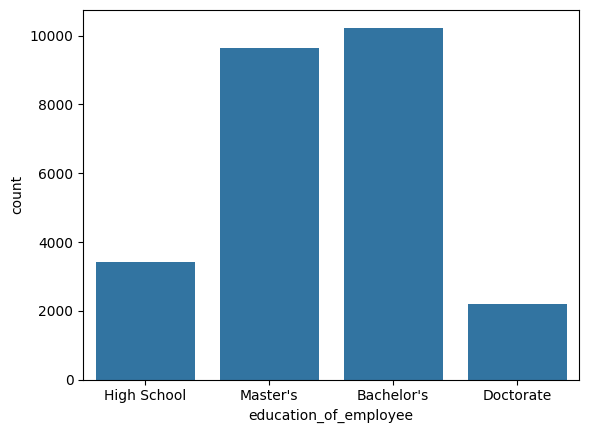

In [26]:
sns.countplot(data=fv,x='education_of_employee')

#### Observations on region of employment

<Axes: xlabel='region_of_employment', ylabel='Count'>

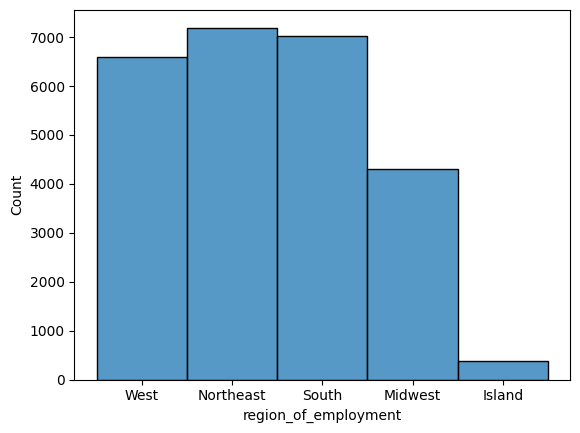

In [27]:
sns.histplot(data=fv,x='region_of_employment')

#### Observations on job experience

<Axes: xlabel='has_job_experience', ylabel='count'>

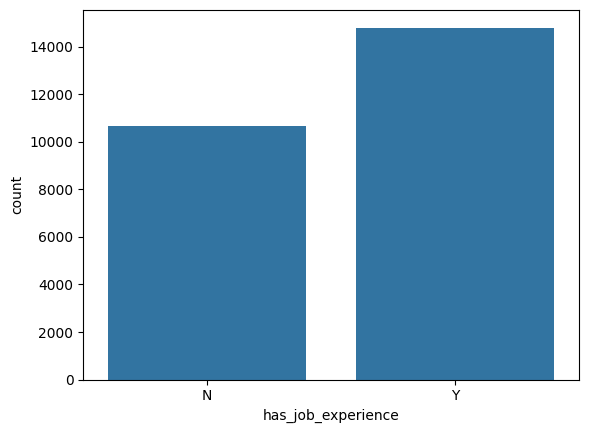

In [ ]:
sns.countplot(data=fv,x='has_job_experience')

#### Observations on case status

<Axes: xlabel='case_status', ylabel='Count'>

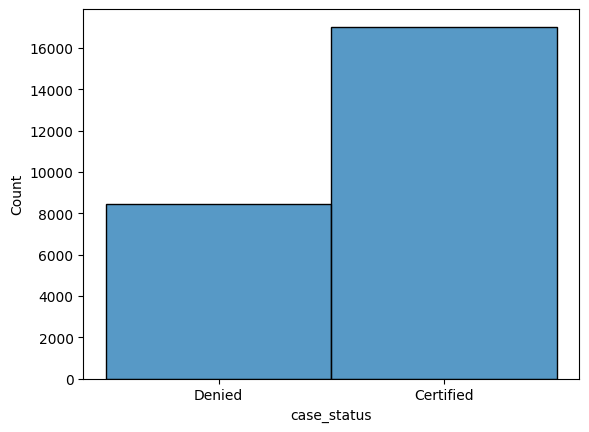

In [ ]:
sns.histplot(data=fv,x='case_status')

Observations:
Education: Out of 25480 employees more people did their Bachelor's degree and only 8.6% did doctorate.
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192

Observation on region of employment: Nearly 28% and 27% of people are employed in northeast and south. Remaining are spread around in west,midwest and island.
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375

Observation on job experience: 56% of the employees have experience on job while 41% are freshers.

Obervation on case status:
There is 66% approval status and 33% declined status.

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [28]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plot.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plot.tight_layout()
    plot.show()

In [29]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plot.legend(
        loc="lower left", frameon=False,
    )
    plot.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plot.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

<Axes: xlabel='education_of_employee', ylabel='case_status'>

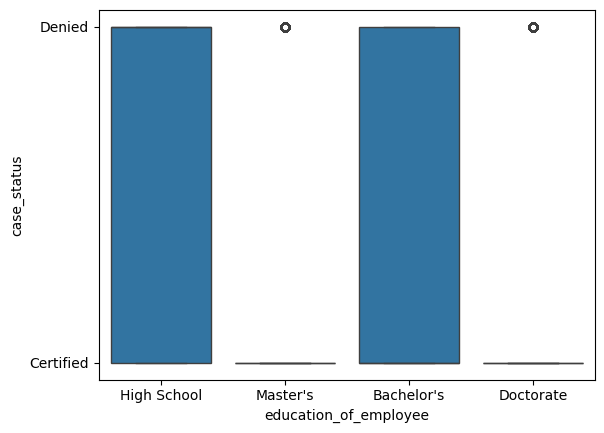

In [30]:
sns.boxplot(data=fv,x='education_of_employee',y='case_status')

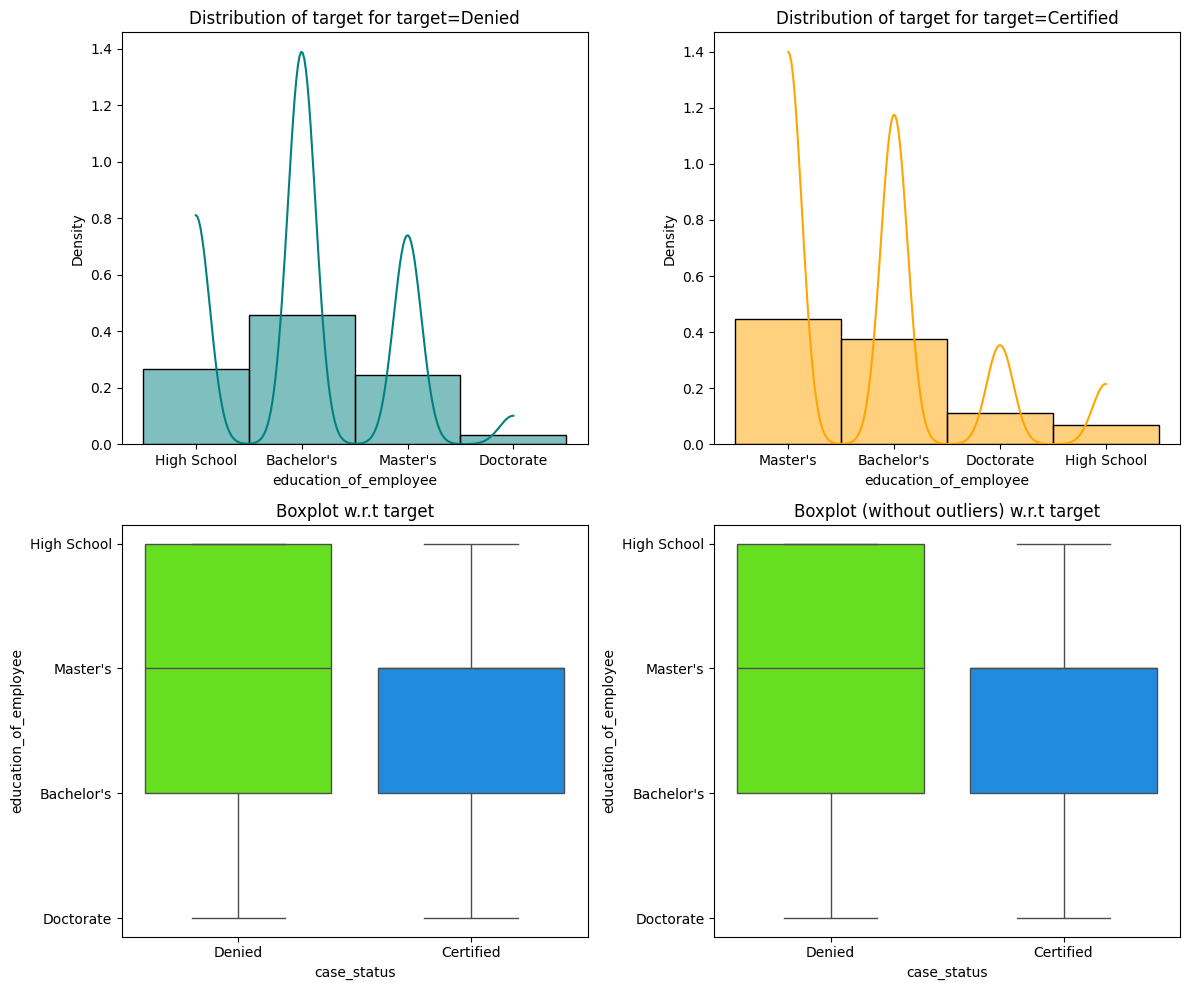

In [31]:
distribution_plot_wrt_target(fv,'education_of_employee','case_status')

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


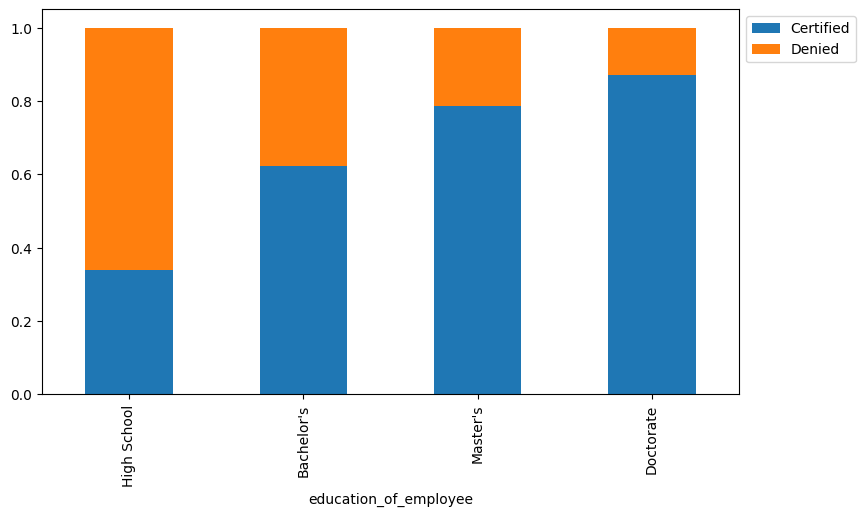

In [32]:
stacked_barplot(fv,'education_of_employee','case_status')

It is evident from the stacked barplot that education plays significant role in visa certification.
Most of the Masters' and Doctorate students have got visa certified rather than bachelor's and high school graduates.

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

<Axes: xlabel='continent', ylabel='case_status'>

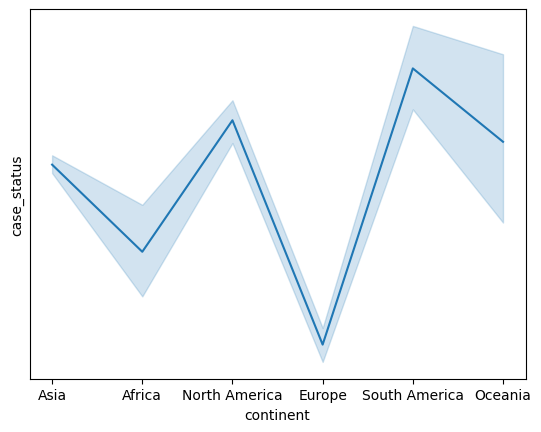

In [31]:
sns.lineplot(data=fv,x='continent',y='case_status')

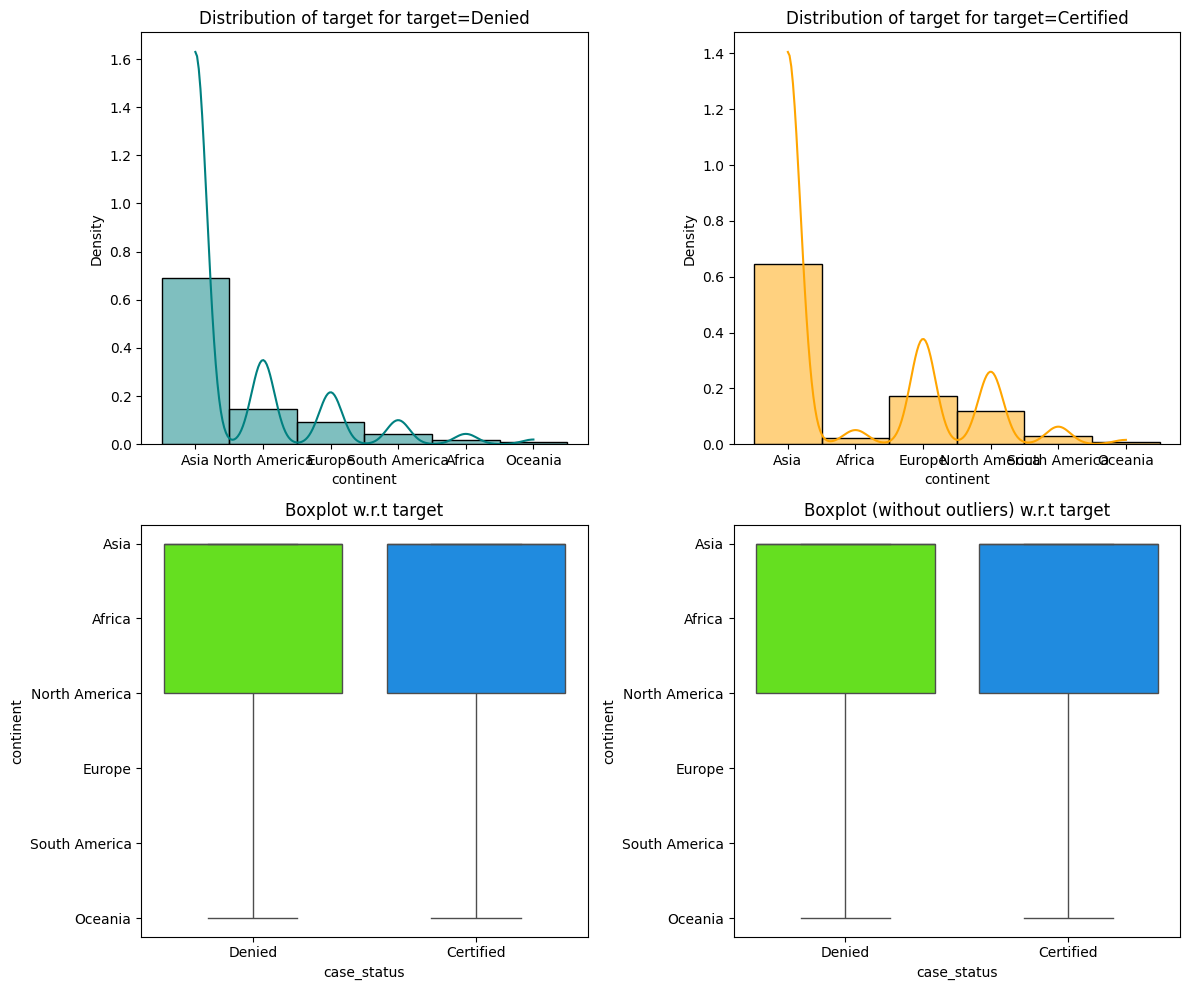

In [33]:
distribution_plot_wrt_target(fv,'continent','case_status')

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


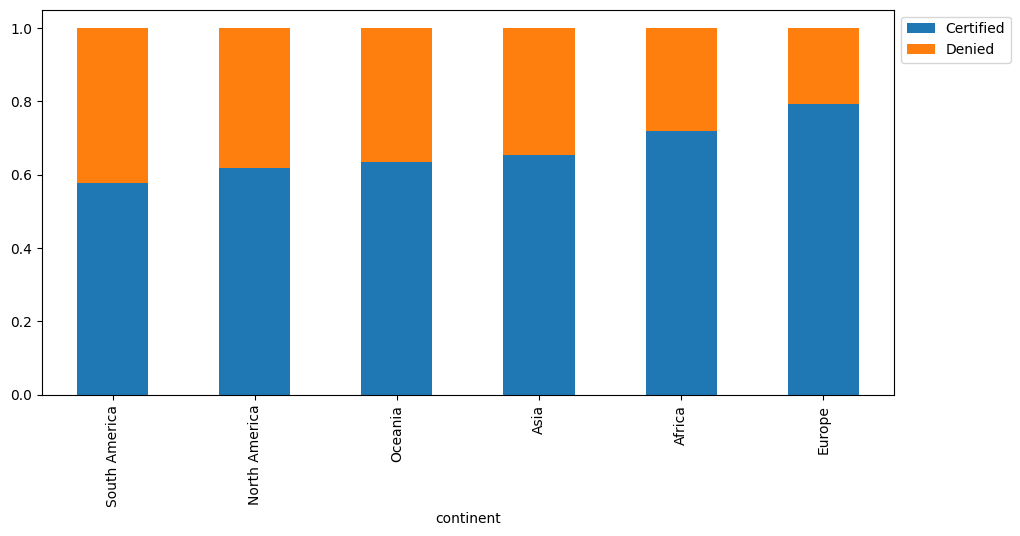

In [34]:
stacked_barplot(fv,'continent','case_status')

Out of 25480 rows nearly 66% are Asian applicants. Out of which only 65% is approved and 34% Asian's visas are rejected.

North America and Europe are the next continents that are interested in acquired US Visa certification. Only 12% and 14% of their citizens apply. Most of the applications get approved or certified. Around 61% and 79% of applications are certified.

South America,Africa and Oceania are the least applied continents and nearly more than 50% of their application is certified.

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


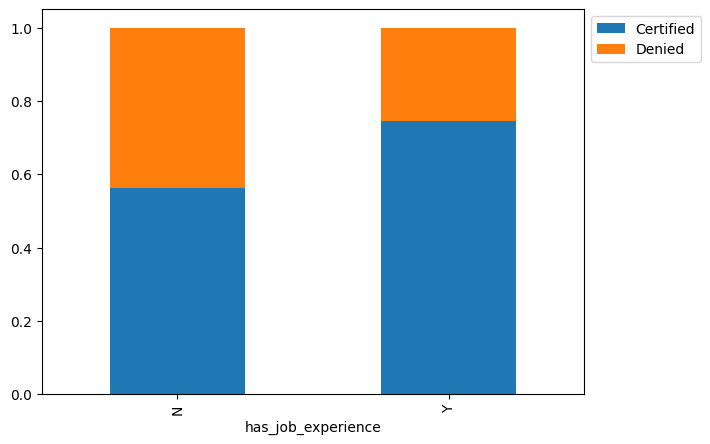

In [35]:
stacked_barplot(fv,'has_job_experience','case_status')

Yes, having prior experience increases the chance of getting certified more than without experience.

Nearly 58% of applicants have job experience and 75% of their applications are approved.

And 42% of applicants does not have job experience and 56% of their applications are approved.

#### Checking if the prevailing wage is similar across all the regions of the US

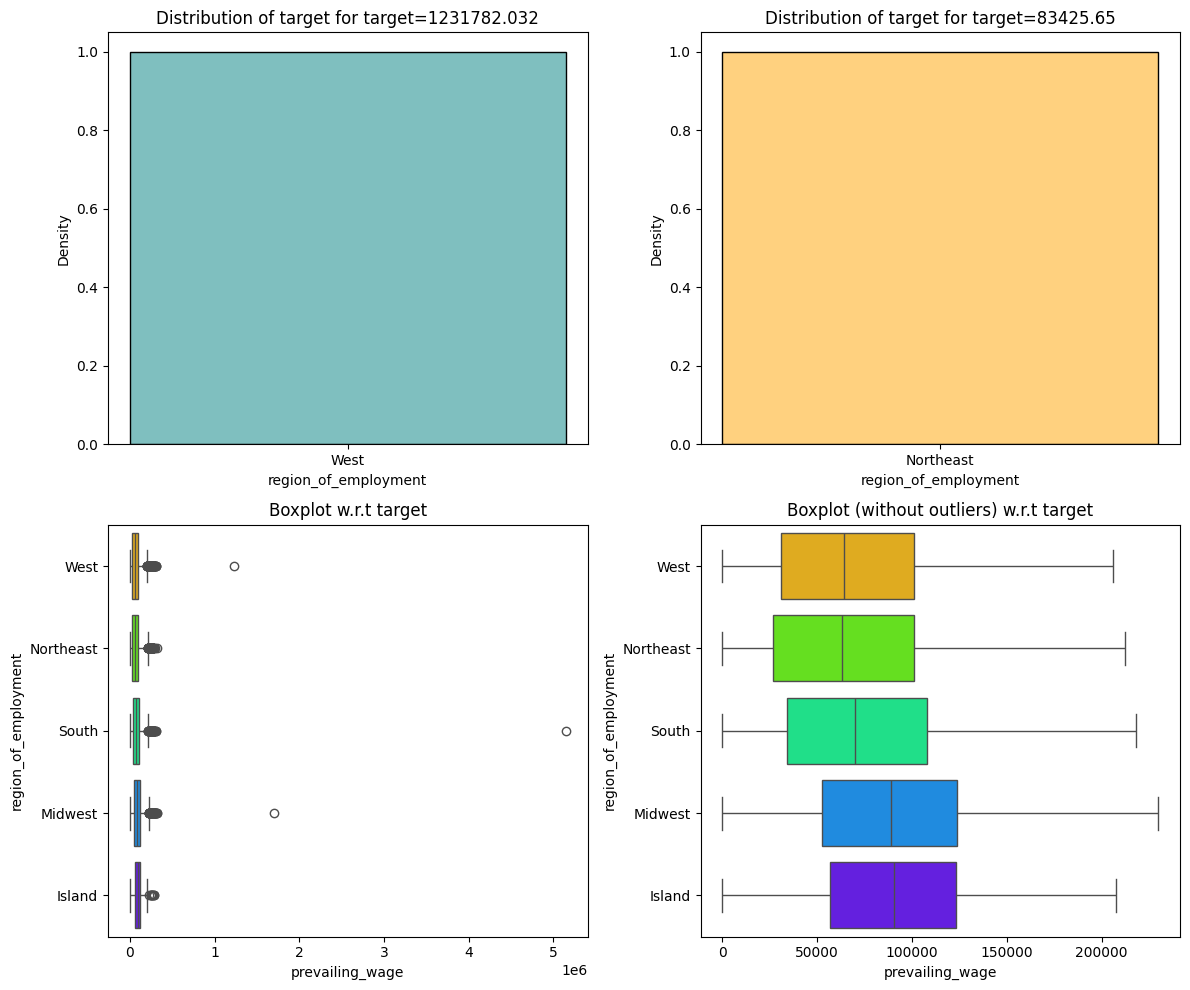

In [36]:
distribution_plot_wrt_target(fv,'region_of_employment','prevailing_wage')

Pervailing wage is nearly same across all regions of employment and is in the range of 100 K to 125 K but there is a slight increase in wages in Island and Midwest regions.

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

<Axes: xlabel='prevailing_wage', ylabel='case_status'>

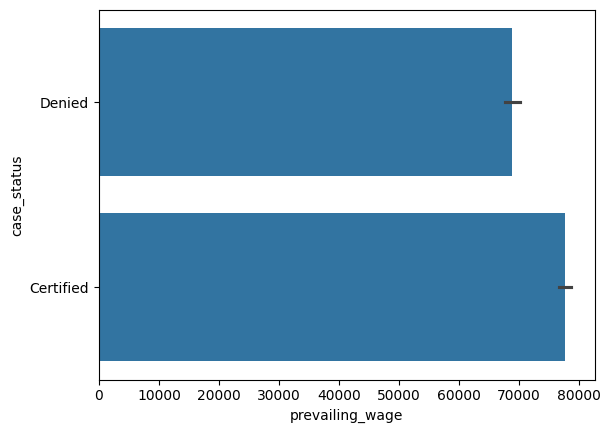

In [42]:
sns.barplot(data=fv,x='prevailing_wage',y='case_status')

Applicants with higher pervailing wages are ceritified more than the applicants with lower pervailing wages.

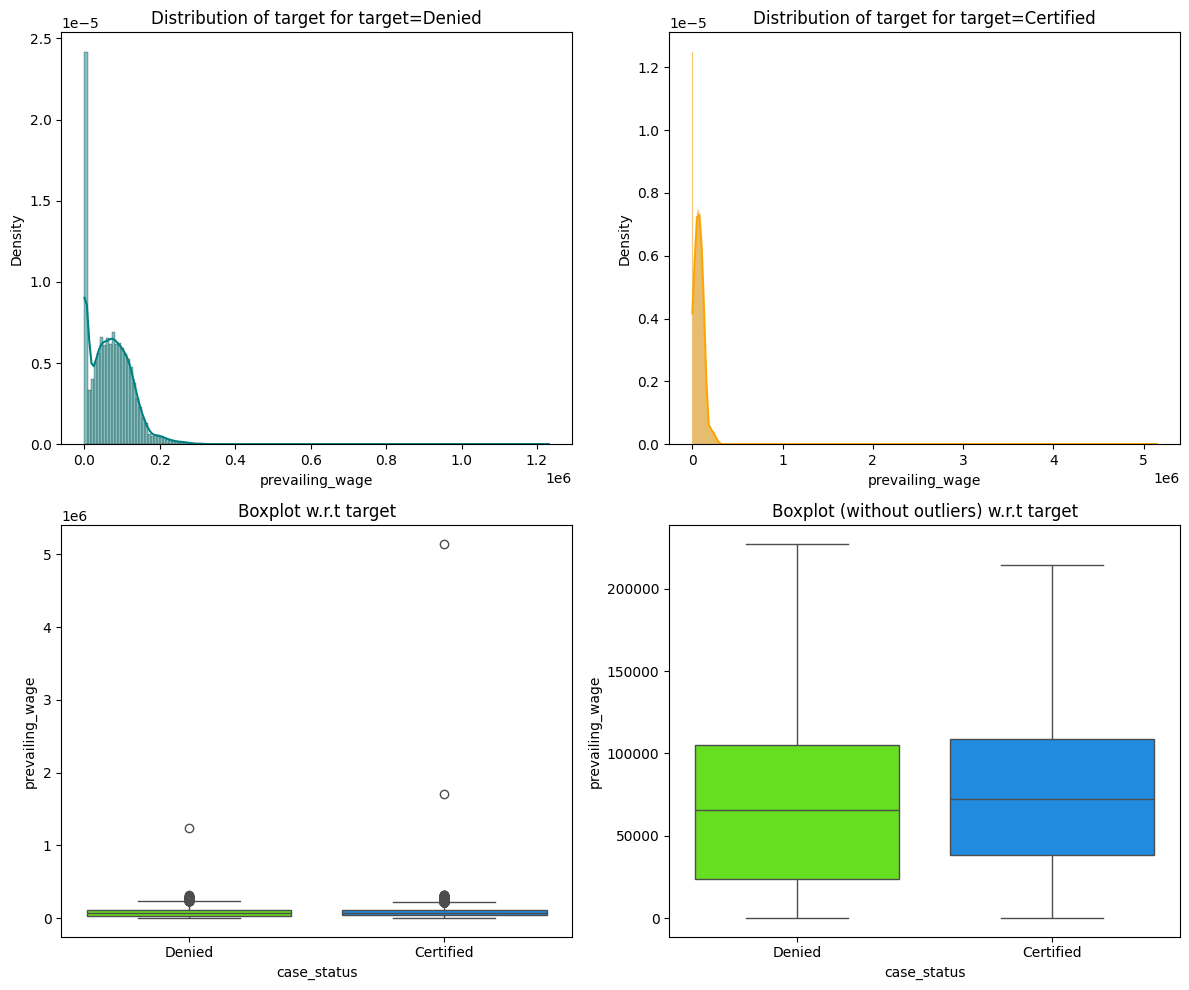

In [43]:
distribution_plot_wrt_target(fv,'prevailing_wage','case_status')

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

In [ ]:
## converting the pervailing wages into yearly format to ensure we can measure the visa certification on pervailing wages
fv['unit_of_wage'].value_counts()
for index in fv.index:
    if fv.loc[index, 'unit_of_wage'] == 'Hour':
        fv.loc[index, 'prevailing_wage'] = fv.loc[index, 'prevailing_wage'] * 2080
        fv.loc[fv['unit_of_wage'] =='Hour','unit_of_wage']='Year'
    elif fv.loc[index, 'unit_of_wage'] == 'Week':
        fv.loc[index, 'prevailing_wage'] = fv.loc[index, 'prevailing_wage'] * 52
        fv.loc[fv['unit_of_wage'] =='Week','unit_of_wage']='Year'
    elif fv.loc[index, 'unit_of_wage'] == 'Month':
        fv.loc[index, 'prevailing_wage'] = fv.loc[index, 'prevailing_wage'] * 12
        fv.loc[fv['unit_of_wage'] =='Month','unit_of_wage']='Year'
    elif fv.loc[index, 'unit_of_wage'] == 'Year':
        fv.loc[index, 'prevailing_wage'] = fv.loc[index, 'prevailing_wage'] * 1

## Data Pre-processing

### Outlier Check

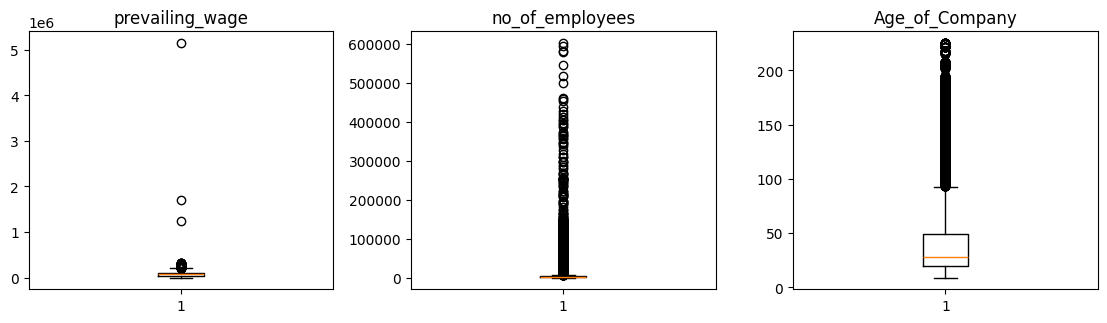

In [46]:
##Detecting outlier in numeric cols:
numeric_columns = ['prevailing_wage','no_of_employees','Age_of_Company']
plot.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plot.subplot(4, 4, i + 1)
    plot.boxplot(fv[variable], whis=1.5)
    plot.tight_layout()
    plot.title(variable)

plot.show()

In [47]:
##Treating outliers
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

Treating Outliers in Prevailing wages,no of employees and age of company.

In [48]:
fv=treat_outliers(fv,'prevailing_wage')
fv=treat_outliers(fv,'no_of_employees')
fv=treat_outliers(fv,'Age_of_Company')

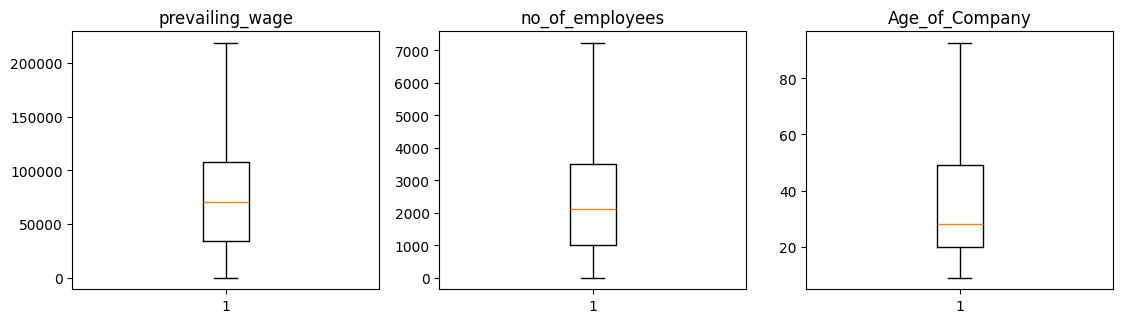

In [49]:
numeric_columns = ['prevailing_wage','no_of_employees','Age_of_Company']
plot.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plot.subplot(4, 4, i + 1)
    plot.boxplot(fv[variable], whis=1.5)
    plot.tight_layout()
    plot.title(variable)

plot.show()

### Data Preparation for modeling

In [14]:
## encoding case status col into 1 and 0
fv['case_status']=fv['case_status'].map({'Certified':1,'Denied':0})

In [15]:
X = fv.drop(['case_status'], axis=1)
y = fv['case_status']

In [16]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape,y_train.shape,y_val.shape,y_test.shape)

(15288, 10) (5096, 10) (5096, 10) (15288,) (5096,) (5096,)


In [17]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_train = X_train.astype(float)

X_val = pd.get_dummies(X_val, drop_first=True)
X_val = X_val.astype(float)

X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.astype(float)

print(X_train.shape, X_val.shape, X_test.shape)



(15288, 19) (5096, 19) (5096, 19)


In [18]:
# Get list of categorical and numerical columns
cat_cols = list(X_train.select_dtypes(include='object').columns)
num_cols = list(X_train.select_dtypes(include=['int', 'float']).columns)
# Get the updated list of categorical columns after one-hot encoding
cat_cols = list(X_train.select_dtypes(include='object').columns) #This line gets updated list

# Impute categorical columns, if any categorical columns remain after one-hot encoding
if cat_cols:  # Proceed with imputation only if cat_cols is not empty
# Impute categorical columns
  cat_imputer = SimpleImputer(strategy='most_frequent')
  cat_imputer.fit(X_train[cat_cols])
  X_train[cat_cols] = cat_imputer.transform(X_train[cat_cols])# fit part learns mode and transform uses it to fill missings
  X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])
  X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# Impute numerical columns
num_imputer = SimpleImputer(strategy='mean')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])#

print(X_train.shape, X_val.shape, X_test.shape,y_train.shape,y_val.shape,y_test.shape)

(15288, 19) (5096, 19) (5096, 19) (15288,) (5096,) (5096,)


In [19]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

no_of_employees                      0
yr_of_estab                          0
prevailing_wage                      0
Age_of_Company                       0
continent_Asia                       0
continent_Europe                     0
continent_North America              0
continent_Oceania                    0
continent_South America              0
education_of_employee_Doctorate      0
education_of_employee_High School    0
education_of_employee_Master's       0
has_job_experience_Y                 0
requires_job_training_Y              0
region_of_employment_Midwest         0
region_of_employment_Northeast       0
region_of_employment_South           0
region_of_employment_West            0
full_time_position_Y                 0
dtype: int64
------------------------------
no_of_employees                      0
yr_of_estab                          0
prevailing_wage                      0
Age_of_Company                       0
continent_Asia                       0
continent_Europe    

## Model Building

### Model Evaluation Criterion

In [20]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [21]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plot.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plot.ylabel("True label")
    plot.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

In [22]:
y_train = y_train[:X_train.shape[0]]

# Ensure consistent shapes before fitting
assert X_train.shape[0] == y_train.shape[0], "Inconsistent number of samples in X_train and y_train"

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

for name, model in models:
  print(f"Model: {name}")
  model.fit(X_train, y_train)
  scores_train = recall_score(y_train, model.predict(X_train))
  print("Train performance {}: {}".format(name, scores_train))
  scores_val = recall_score(y_val, model.predict(X_val))
  print("Val performance {}: {}".format(name, scores_val))
  print("\n\n")

Model: Bagging
Train performance Bagging: 0.9893241919686582
Val performance Bagging: 0.781433607520564



Model: Random forest
Train performance Random forest: 1.0
Val performance Random forest: 0.8340188014101058



Model: GBM
Train performance GBM: 0.8801175318315377
Val performance GBM: 0.8748531139835488



Model: Adaboost
Train performance Adaboost: 0.8874632713026445
Val performance Adaboost: 0.8804347826086957



Model: dtree
Train performance dtree: 1.0
Val performance dtree: 0.7473560517038778





Model GBM and Adaboost have great performance in original model building.

### Model Building with oversampled data

In [23]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
# sampling_strategy is ratio of minority to majority after sampling
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10210
Before Oversampling, counts of label 'No': 5078 

After Oversampling, counts of label 'Yes': 10210
After Oversampling, counts of label 'No': 10210 

After Oversampling, the shape of train_X: (20420, 19)
After Oversampling, the shape of train_y: (20420,) 



In [24]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

for name, model in models:
  print(f"Model {name}")
  model.fit(X_train_over, y_train_over)
  scores = recall_score(y_train_over, model.predict(X_train_over))
  print("Train score {}: {}".format(name, scores))
  scores_val = recall_score(y_val, model.predict(X_val))
  print("Val score {}: {}".format(name, scores_val))
  print("\n")


Model Bagging
Train score Bagging: 0.9854064642507345
Val score Bagging: 0.7646886016451234


Model Random forest
Train score Random forest: 1.0
Val score Random forest: 0.8257931844888367


Model GBM
Train score GBM: 0.8648383937316356
Val score GBM: 0.8554641598119859


Model Adaboost
Train score Adaboost: 0.8438785504407443
Val score Adaboost: 0.8351938895417156


Model dtree
Train score dtree: 1.0
Val score dtree: 0.7403055229142186




### Model Building with undersampled data

In [25]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1, random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


In [26]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 19)
After Under Sampling, the shape of train_y: (10156,) 



In [27]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

for name, model in models:
  print(f"Model {name}")
  model.fit(X_train_un, y_train_un)
  scores = recall_score(y_train_un, model.predict(X_train_un))
  print("Train score {}: {}".format(name, scores))
  scores_val = recall_score(y_val, model.predict(X_val))
  print("Val score {}: {}".format(name, scores_val))
  print("\n")


Model Bagging
Train score Bagging: 0.9692792437967703
Val score Bagging: 0.6113396004700352


Model Random forest
Train score Random forest: 1.0
Val score Random forest: 0.672737955346651


Model GBM
Train score GBM: 0.7518708152816069
Val score GBM: 0.7358989424206815


Model Adaboost
Train score Adaboost: 0.7120913745569122
Val score Adaboost: 0.7132784958871915


Model dtree
Train score dtree: 1.0
Val score dtree: 0.6266157461809636




Model GBM and Adaboost have great performances in original models,over sampled models and under sampled models.

So, out of 15 models created we can tune the three models below:
Adaboost model in original model building,
Model GBM trained with oversampled data,
Model GBM trained with undersampled data.


## Hyperparameter Tuning

Tuning the Original Adaboost model

In [30]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
from sklearn import metrics
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=30, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(30), 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9729676787463271:


In [31]:
adb_tuned = AdaBoostClassifier(
    random_state=1,
    n_estimators=30,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
adb_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=30, random_state=1)

In [32]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(adb_tuned, X_train, y_train)
adb_train

,Accuracy,Recall,Precision,F1
0,0.692831,0.972968,0.692072,0.808826


In [33]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(adb_tuned, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.690934,0.970917,0.691278,0.807575


Tuning Model GBM -Undersampled

In [34]:
Model = GradientBoostingClassifier(random_state=1)
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(100,150,45),
    "learning_rate": [0.01, 0.2, 0.1,0.05, 1],
    "subsample":[0.8,0.9],
    "max_features":[0.3,0.6,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=25, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': np.int64(145), 'max_features': 0.3, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7459648578410457:


In [35]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.8,
    n_estimators=145,
    max_features=0.3,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.3,
                           n_estimators=145, random_state=1, subsample=0.8)

In [36]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.708251,0.754037,0.690781,0.721024


In [37]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.72292,0.74765,0.821498,0.782836


Tuning Model GBM -Oversampled

In [38]:
Model = GradientBoostingClassifier(random_state=1)
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,90,145),
    "learning_rate": [0.01, 0.1,0.08, 1],
    "subsample":[0.8,0.9,0.2],
    "max_features":[0.3,0.6,1,0.7],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=15, scoring=scorer, cv=4, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': np.int64(75), 'max_features': 0.6, 'learning_rate': 0.08, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8493705773034859:


In [40]:
##build the model
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.8,
    n_estimators=75,
    max_features=0.6,
    learning_rate=0.08,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.08, max_features=0.6,
                           n_estimators=75, random_state=1, subsample=0.8)

In [41]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(
    tuned_gbm2, X_train_over, y_train_over
)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.810186,0.855436,0.784444,0.818403


In [42]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.748038,0.846063,0.791209,0.817717


## Model Performances

In [45]:
models_train_comp = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T,
    ],
    axis=1,
)
models_train_comp.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Original data",
]
print("Training performance comparison:")
models_train_comp

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Original data
Accuracy,0.708251,0.810186,0.692831
Recall,0.754037,0.855436,0.972968
Precision,0.690781,0.784444,0.692072
F1,0.721024,0.818403,0.808826


In [46]:
models_Validation_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb_val.T], axis=1,

    )
models_Validation_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_Validation_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.722920,0.748038,0.690934
Recall,0.747650,0.846063,0.970917
Precision,0.821498,0.791209,0.691278
F1,0.782836,0.817717,0.807575


In [47]:
# Let's check the performance on test set for Adaboost original model
adb_test = model_performance_classification_sklearn(adb_tuned, X_test, y_test)
adb_test

,Accuracy,Recall,Precision,F1
0,0.688187,0.968273,0.689973,0.805769


In [48]:
# Let's check the performance on test set for Gradient Boosting with oversampled data
gbm_test2 = model_performance_classification_sklearn(tuned_gbm2, X_test, y_test)
gbm_test2

,Accuracy,Recall,Precision,F1
0,0.739207,0.853702,0.777629,0.813892


From the above performance check with unseen test data it is evident that with hypertuning Model GBM with oversampled data have shown excellent metrics.

Feature Importance:

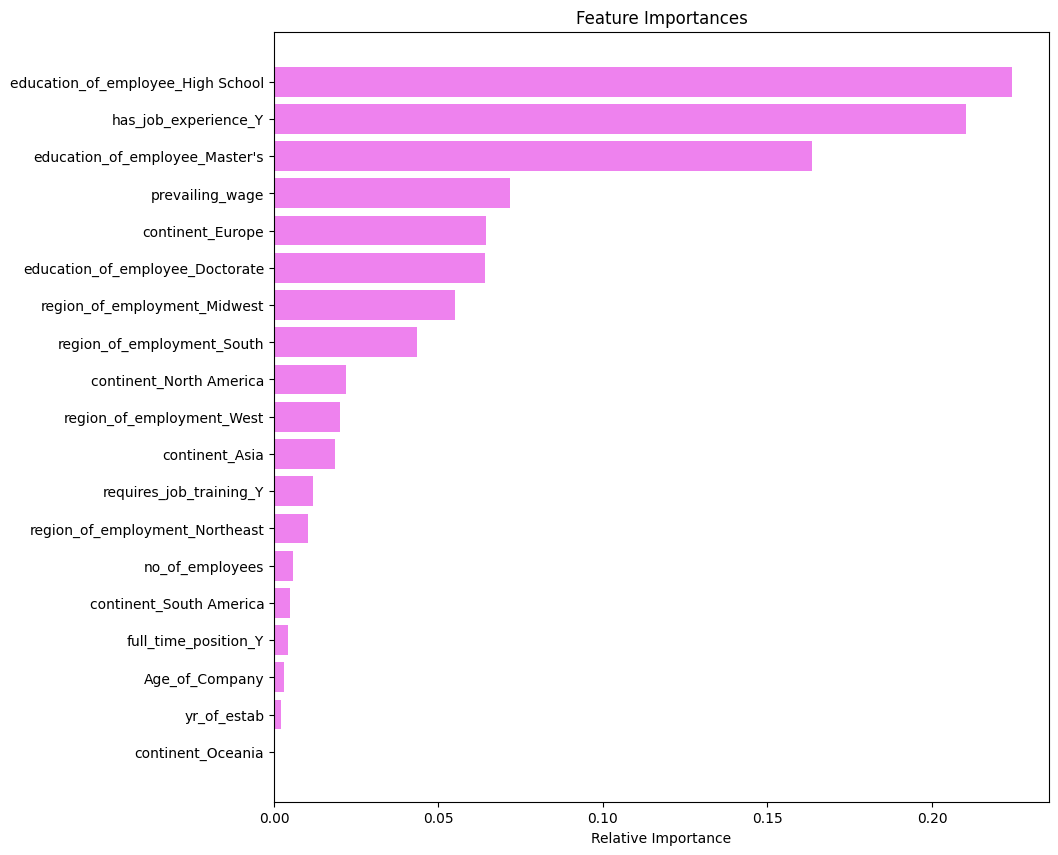

In [52]:
feature_names = X_train.columns
importances = tuned_gbm2.feature_importances_
indices = np.argsort(importances)

plot.figure(figsize=(10, 10))
plot.title("Feature Importances")
plot.barh(range(len(indices)), importances[indices], color="violet", align="center")
plot.yticks(range(len(indices)), [feature_names[i] for i in indices])
plot.xlabel("Relative Importance")
plot.show()

So as seen from above the education of employees and Experience on job are the most mandatory features for the Visa to be certified.

## Actionable Insights and Recommendations



*   It is observed from the analysis and model building that applicants for visa certification should definitely have a high school degree.
*  There is more approval with doctorate and masters graduates though.
*   Also experienced applicants with highest prevailing wages have a chance of definite visa certification rather than fresher with low prevailing wage.
*   Applicants from Europe,North America have highest approval rates.
*   It is preferred to be empolyed in midwest,south or west regions with higher prevailing wages along with experience and highest qualification in education.This is definite way to get visa certification.
*   The company the applicant is working for or if he is on full time poisition or the background of the company are of least importance with respect to visa certification.














<font size=6 color='blue'>Power Ahead</font>
___